## Description
It takes a GWAS on a random phenotype and verifies that the Manhattan and QQ-plots look fine (without inflation).

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot_2samples
from scipy.stats import uniform
from pathlib import Path

In [8]:
GWAS_DIR = Path(os.environ["PHENOPLIER_RESULTS_GLS_NULL_SIMS_UKB_50PCS"]) / "post_imputed_gwas"
print(GWAS_DIR)

/tmp/phenoplier/results/gls/gwas/null_sims/ukb_50pcs/post_imputed_gwas


In [9]:
def load_gwas_data(filename):
    """Load GWAS data, filter P values, and return a DataFrame."""
    filepath = os.path.join(GWAS_DIR, filename)
    gwas = pd.read_csv(filepath, sep="\t")
    gwas = gwas[(gwas["pvalue"] >= 0) & (gwas["pvalue"] <= 1)]
    return gwas

In [10]:
def plot_manhattan(gwas, chr_col, bp_col, p_col, snp_col, title):
    """Generate a Manhattan plot."""
    gwas["-log10P"] = -np.log10(gwas[p_col])
    plt.figure(figsize=(20, 10))
    gwas[chr_col] = gwas[chr_col].astype("category")
    gwas.sort_values(by=[chr_col, bp_col], inplace=True)
    gwas["ind"] = range(len(gwas))
    groups = gwas.groupby(chr_col)

    for i, (name, group) in enumerate(groups):
        plt.scatter(
            group["ind"],
            group["-log10P"],
            s=5,
            label=name,
            color=plt.cm.tab20.colors[i % 20]
        )

    plt.axhline(-np.log10(5e-8), color="red", linestyle="--", label="Genome-wide line")
    plt.xlabel("Chromosome")
    plt.ylabel("-log10(p-value)")
    plt.title(title)
    plt.legend(title="Chromosome", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.ylim(0, 10)
    plt.tight_layout()
    plt.show()

In [11]:
def plot_qq(p_values, title):    
    """Generate a QQ plot for GWAS p-values."""
    # Use the uniform distribution as the null distribution!!!
    # Do -log10 transformation to p-values!
    # use func qq plot 2samples
    # x: expected array
    # y: observed array
    
    # Use np.random.unitform to generate expected values with the same size as the observed p_values
    # Or may use linspace instead of random.uniform, don't include 0 and 1. maybe 1 is okay but 0 is not.
    
    # Run TWAS when 
    
    # Calculate expected p-values (under uniform distribution)
    n = len(p_values)
    expected_p_values = np.arange(1, n + 1) / (n + 1)
    
    # Convert to -log10 scale
    observed_log_p = -np.log10(p_values)
    expected_log_p = -np.log10(expected_p_values)
    
    qqplot_2samples(expected_log_p, observed_log_p, xlabel="Expected -log10(p)", ylabel="Observed -log10(p)", line='45')
    plt.title(title)
    plt.show()

Phenotype 0: Dimensions = (8822585, 15)
    variant_id    panel_variant_id chromosome  position effect_allele  \
0  rs554008981  chr1_13550_G_A_b38       chr1     13550             A   
1  rs201055865  chr1_14671_G_C_b38       chr1     14671             C   
2  rs201327123  chr1_14677_G_A_b38       chr1     14677             A   
3  rs199856693  chr1_14933_G_A_b38       chr1     14933             A   
4   rs62636368  chr1_16841_G_T_b38       chr1     16841             T   

  non_effect_allele current_build  frequency  sample_size    zscore    pvalue  \
0                 G          hg38   0.017316        10000 -0.844615  0.398326   
1                 G          hg38   0.012987        10000 -0.456523  0.648014   
2                 G          hg38   0.053391        10000  0.823274  0.410352   
3                 G          hg38   0.011544        10000  0.803826  0.421497   
4                 G          hg38   0.045455        10000  0.076305  0.939176   

   effect_size  standard_error imp

/tmp/ipykernel_3200397/3067375492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = gwas.groupby(chr_col)


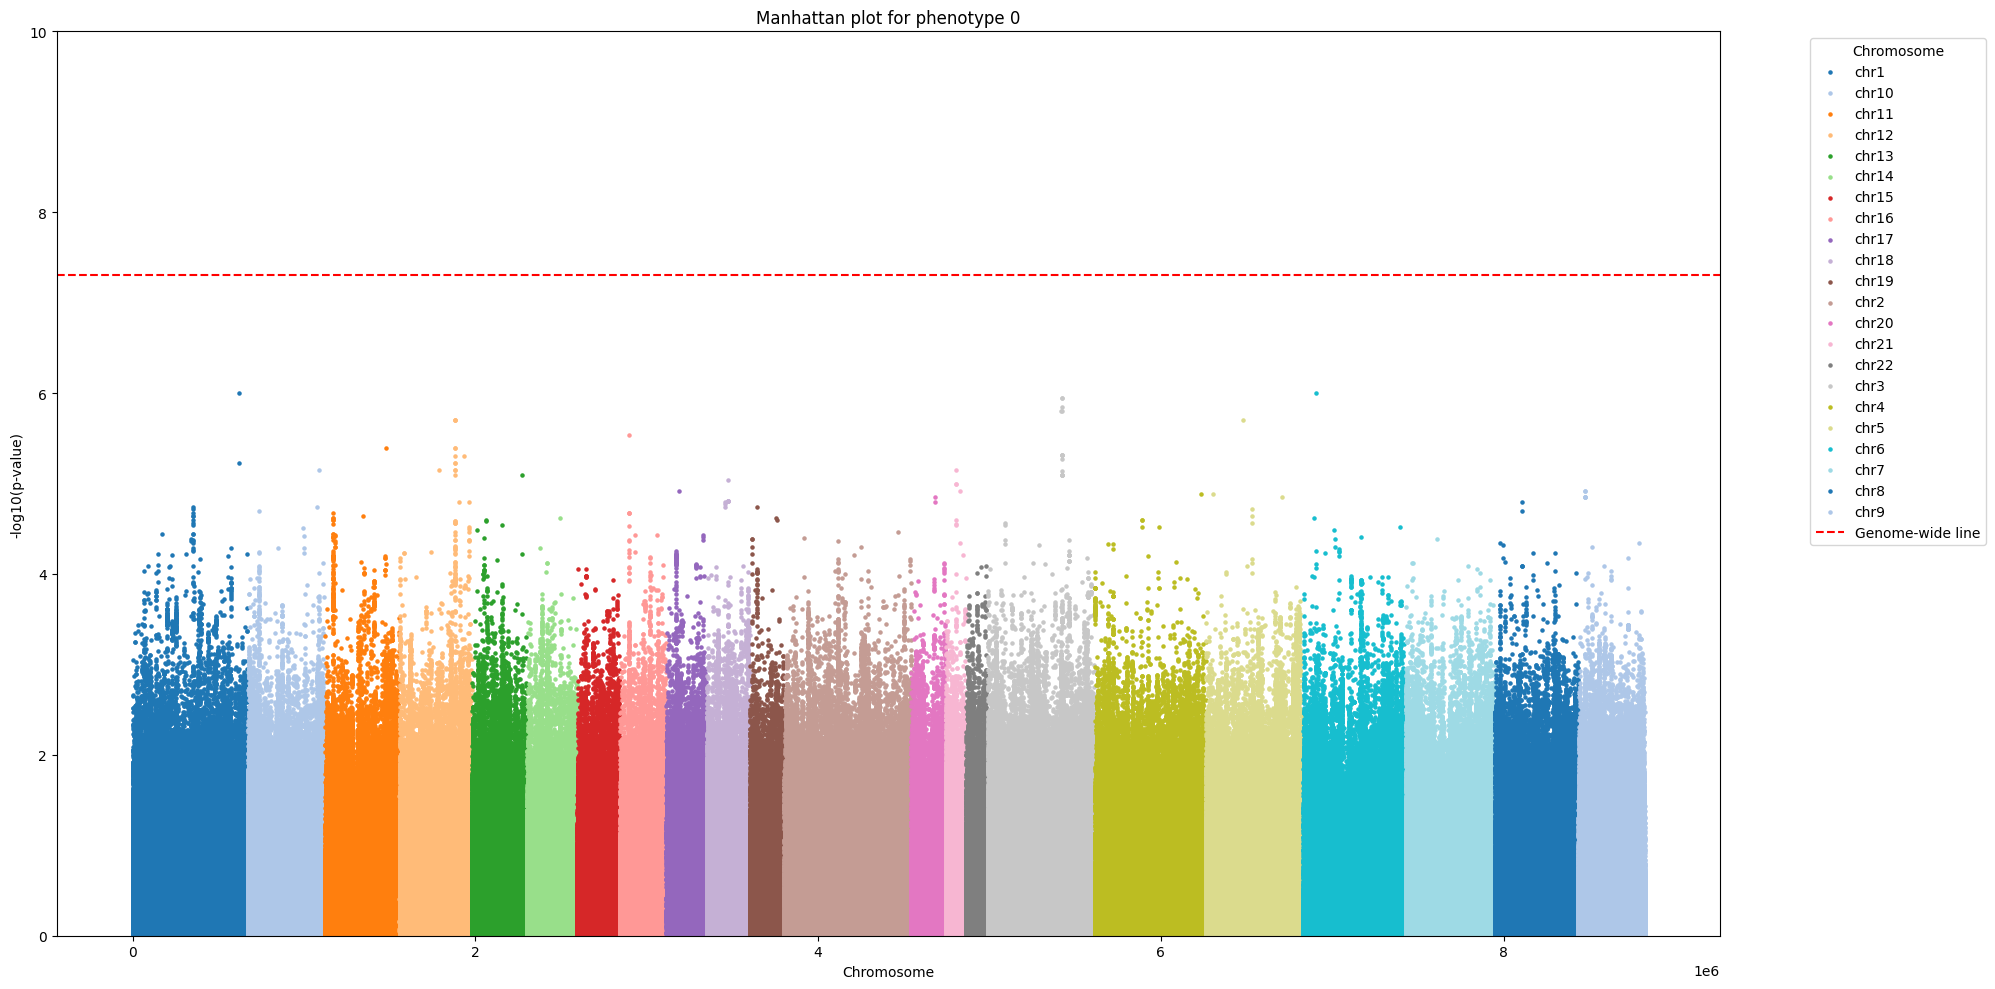

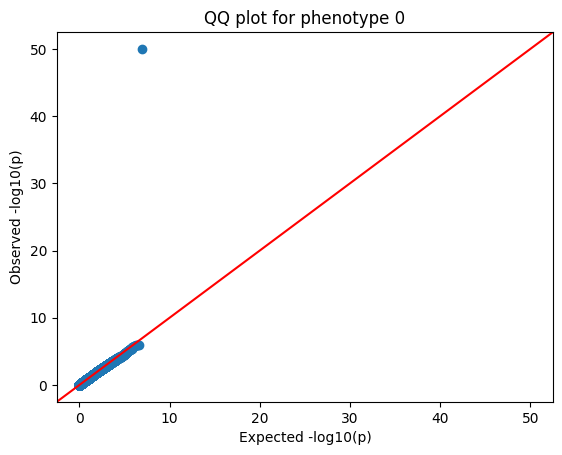

Phenotype 1: Dimensions = (8822585, 15)
    variant_id    panel_variant_id chromosome  position effect_allele  \
0  rs554008981  chr1_13550_G_A_b38       chr1     13550             A   
1  rs201055865  chr1_14671_G_C_b38       chr1     14671             C   
2  rs201327123  chr1_14677_G_A_b38       chr1     14677             A   
3  rs199856693  chr1_14933_G_A_b38       chr1     14933             A   
4   rs62636368  chr1_16841_G_T_b38       chr1     16841             T   

  non_effect_allele current_build  frequency  sample_size    zscore    pvalue  \
0                 G          hg38   0.017316        10000  0.289119  0.772491   
1                 G          hg38   0.012987        10000  0.696452  0.486146   
2                 G          hg38   0.053391        10000  1.346697  0.178078   
3                 G          hg38   0.011544        10000 -0.559341  0.575929   
4                 G          hg38   0.045455        10000 -1.321904  0.186200   

   effect_size  standard_error imp

/tmp/ipykernel_3200397/3067375492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = gwas.groupby(chr_col)


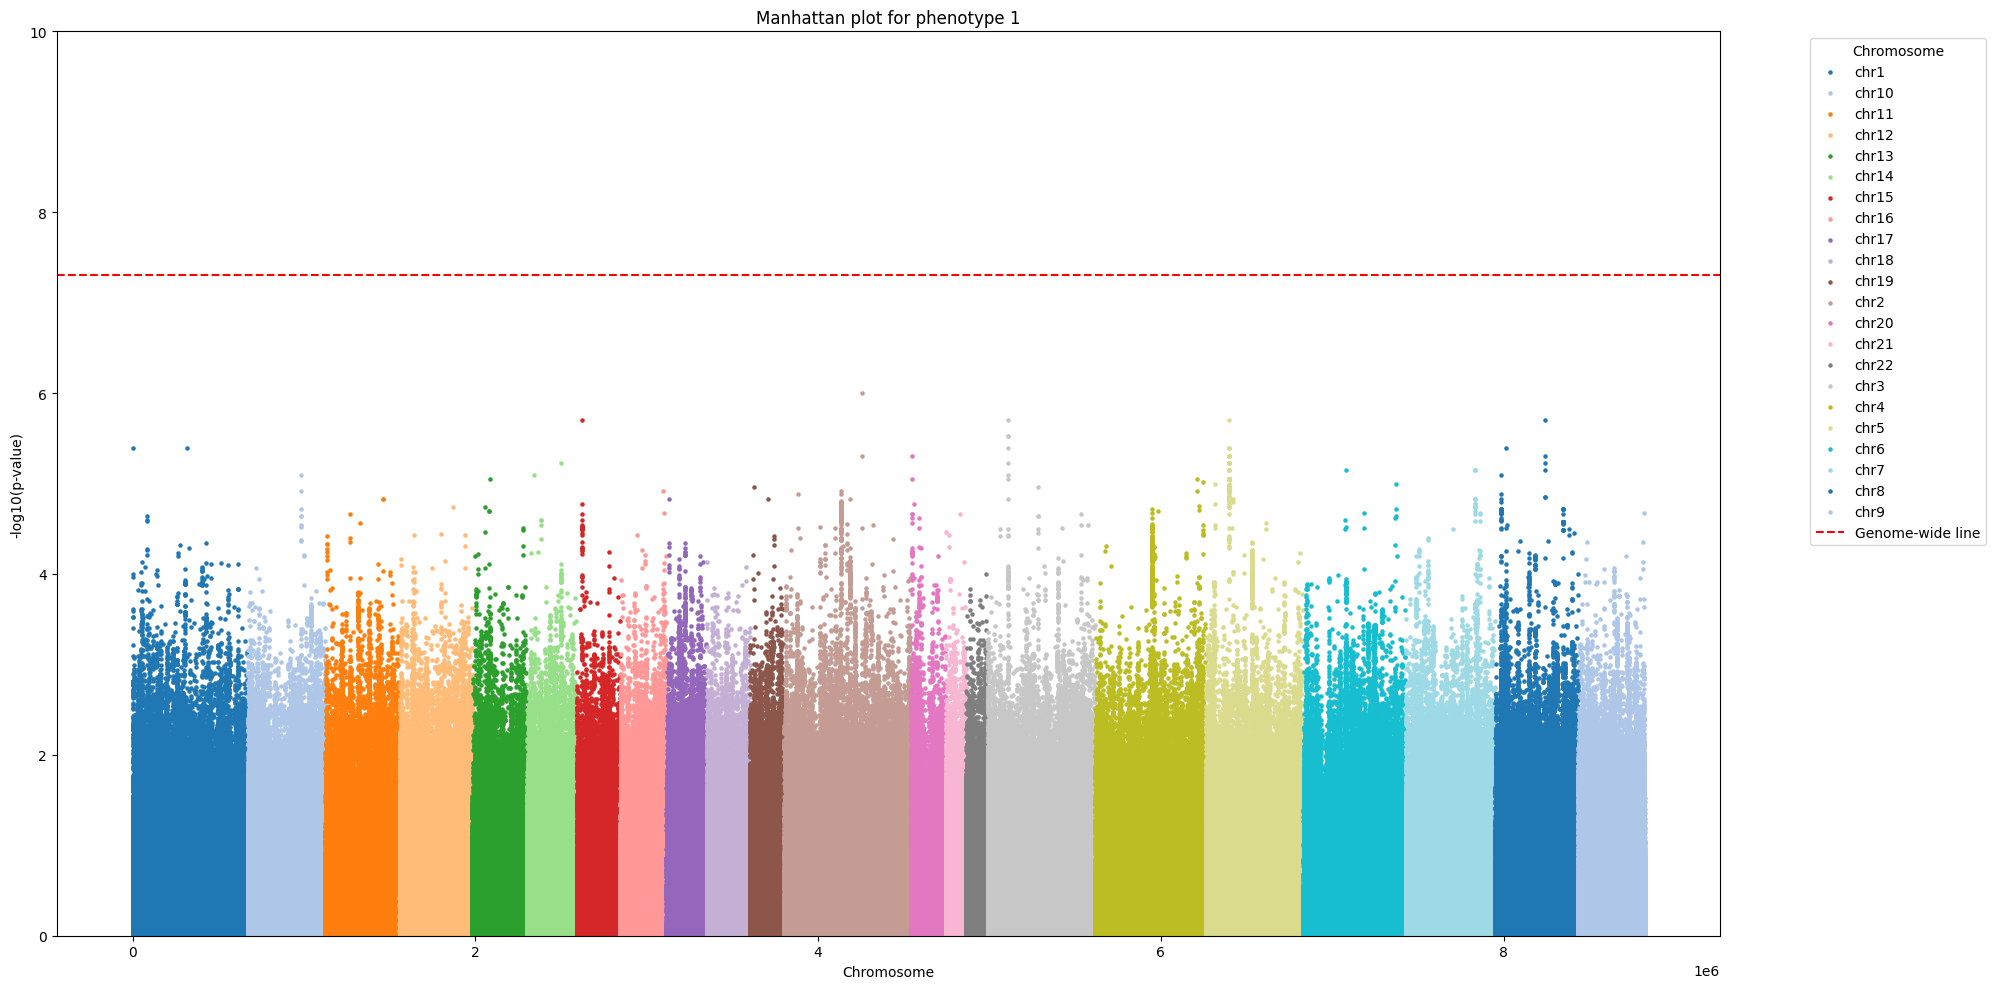

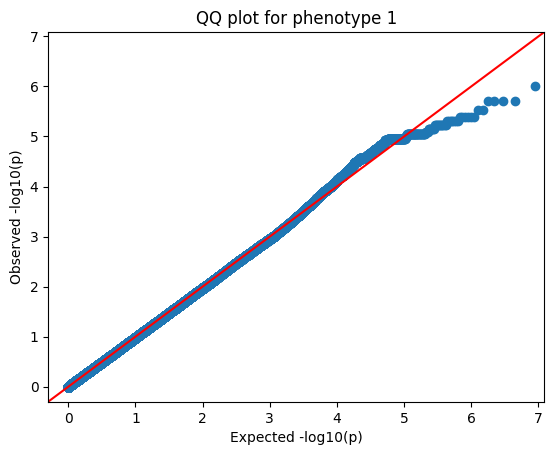

Phenotype 2: Dimensions = (8822585, 15)
    variant_id    panel_variant_id chromosome  position effect_allele  \
0  rs554008981  chr1_13550_G_A_b38       chr1     13550             A   
1  rs201055865  chr1_14671_G_C_b38       chr1     14671             C   
2  rs201327123  chr1_14677_G_A_b38       chr1     14677             A   
3  rs199856693  chr1_14933_G_A_b38       chr1     14933             A   
4   rs62636368  chr1_16841_G_T_b38       chr1     16841             T   

  non_effect_allele current_build  frequency  sample_size    zscore    pvalue  \
0                 G          hg38   0.017316        10000 -1.159469  0.246265   
1                 G          hg38   0.012987        10000 -0.131974  0.895005   
2                 G          hg38   0.053391        10000 -2.049455  0.040418   
3                 G          hg38   0.011544        10000 -0.957704  0.338212   
4                 G          hg38   0.045455        10000 -0.833101  0.404788   

   effect_size  standard_error imp

/home/haoyu/anaconda3/envs/phenoplier-cli/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_3200397/3067375492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = gwas.groupby(chr_col)


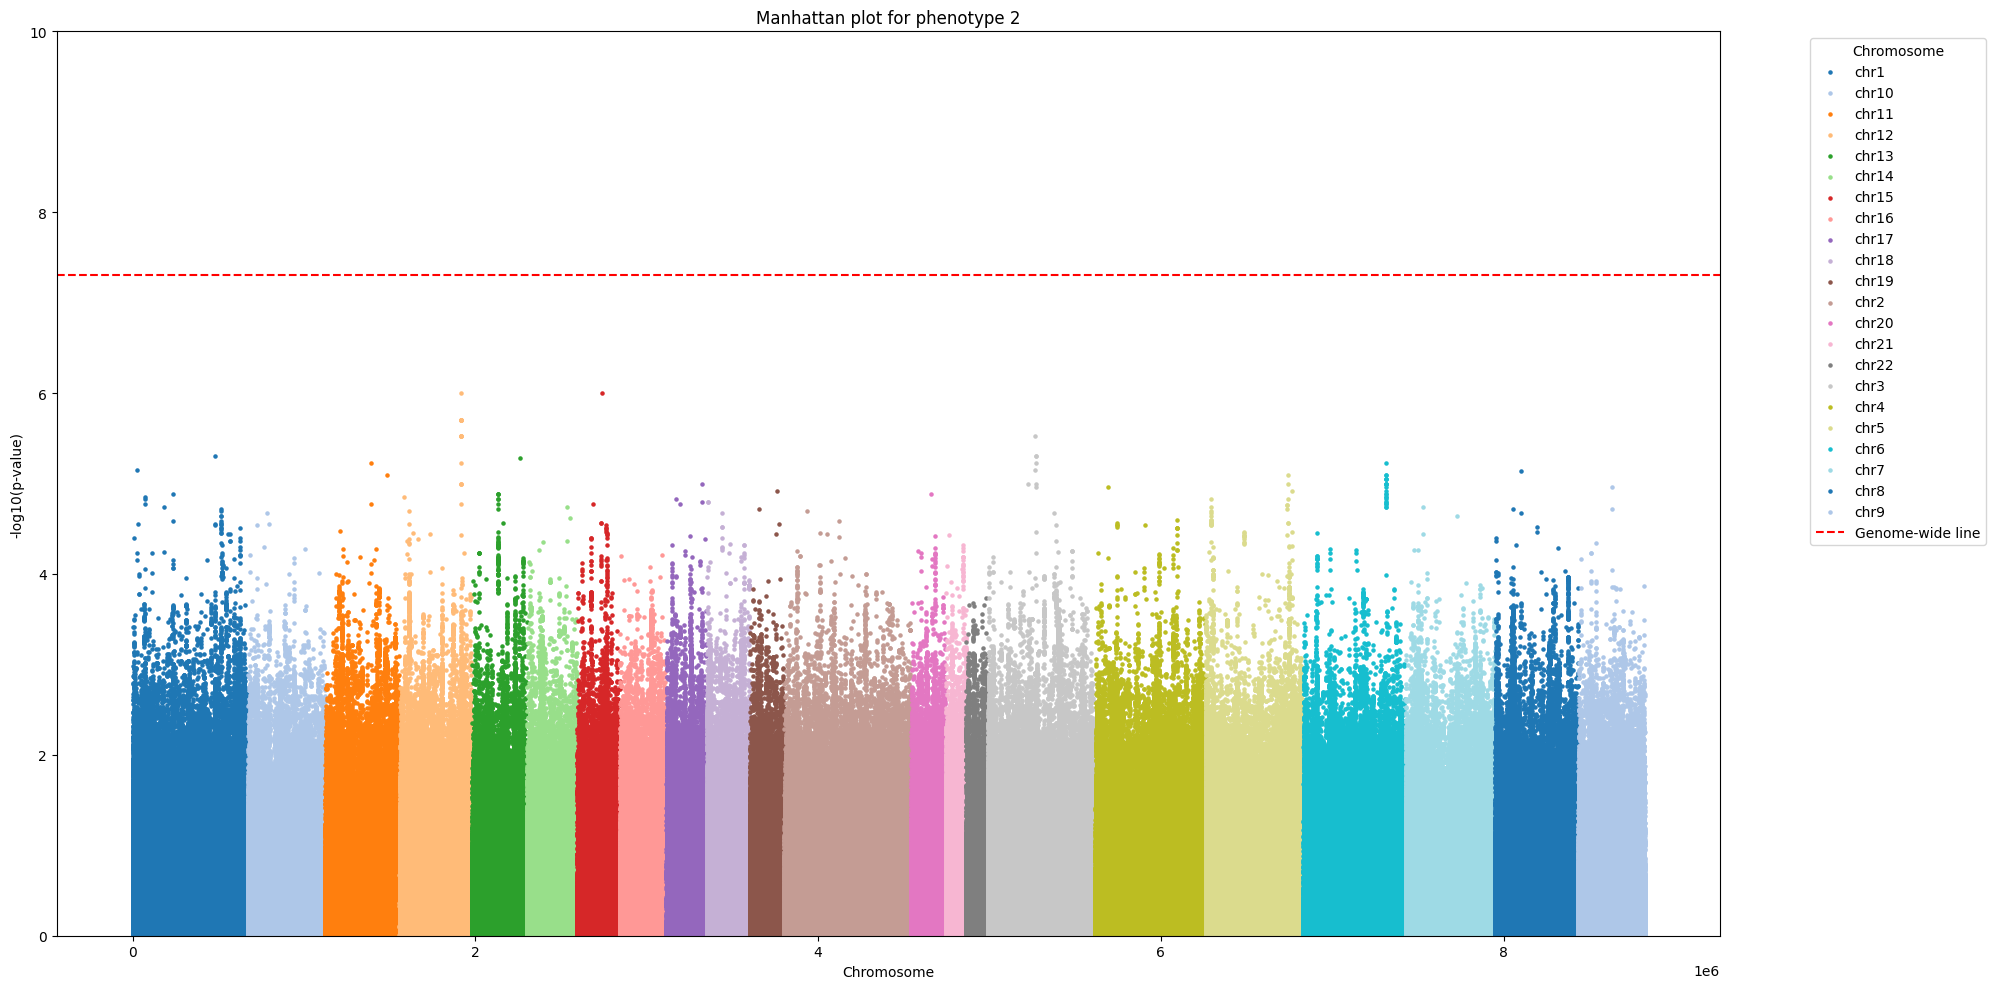

/home/haoyu/anaconda3/envs/phenoplier-cli/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


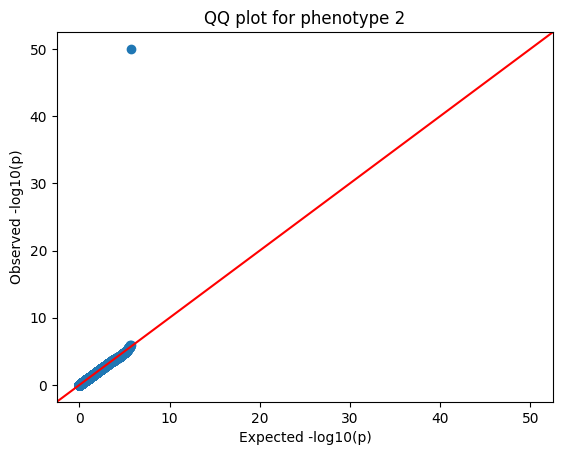

Phenotype 3: Dimensions = (8822585, 15)
    variant_id    panel_variant_id chromosome  position effect_allele  \
0  rs554008981  chr1_13550_G_A_b38       chr1     13550             A   
1  rs201055865  chr1_14671_G_C_b38       chr1     14671             C   
2  rs201327123  chr1_14677_G_A_b38       chr1     14677             A   
3  rs199856693  chr1_14933_G_A_b38       chr1     14933             A   
4   rs62636368  chr1_16841_G_T_b38       chr1     16841             T   

  non_effect_allele current_build  frequency  sample_size    zscore    pvalue  \
0                 G          hg38   0.017316        10000 -0.515258  0.606372   
1                 G          hg38   0.012987        10000 -0.046491  0.962919   
2                 G          hg38   0.053391        10000  0.124374  0.901020   
3                 G          hg38   0.011544        10000  0.065236  0.947986   
4                 G          hg38   0.045455        10000 -0.724392  0.468825   

   effect_size  standard_error imp

/home/haoyu/anaconda3/envs/phenoplier-cli/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_3200397/3067375492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = gwas.groupby(chr_col)


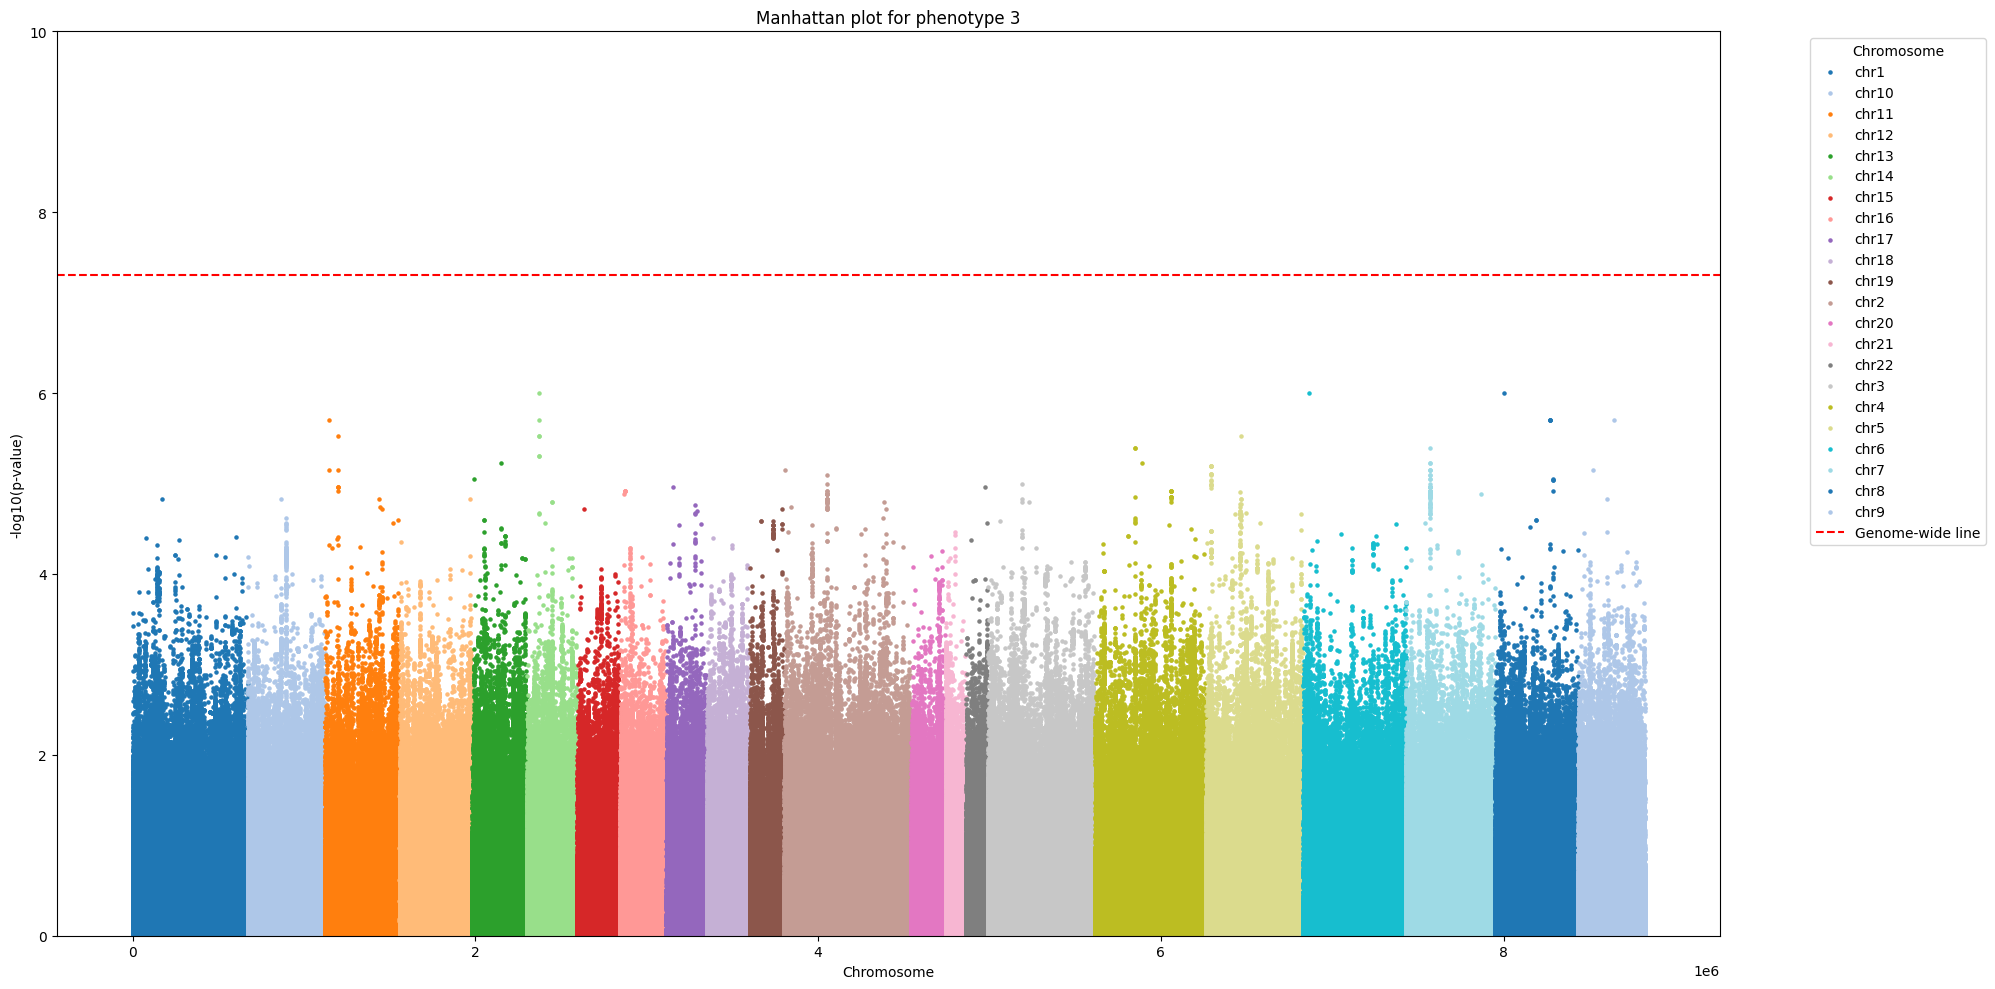

/home/haoyu/anaconda3/envs/phenoplier-cli/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


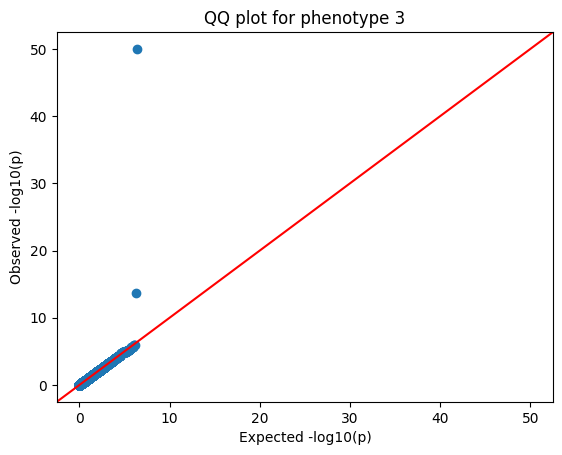

Phenotype 4: Dimensions = (8822585, 15)
    variant_id    panel_variant_id chromosome  position effect_allele  \
0  rs554008981  chr1_13550_G_A_b38       chr1     13550             A   
1  rs201055865  chr1_14671_G_C_b38       chr1     14671             C   
2  rs201327123  chr1_14677_G_A_b38       chr1     14677             A   
3  rs199856693  chr1_14933_G_A_b38       chr1     14933             A   
4   rs62636368  chr1_16841_G_T_b38       chr1     16841             T   

  non_effect_allele current_build  frequency  sample_size    zscore    pvalue  \
0                 G          hg38   0.017316        10000 -0.645501  0.518602   
1                 G          hg38   0.012987        10000  1.101010  0.270892   
2                 G          hg38   0.053391        10000  0.316600  0.751547   
3                 G          hg38   0.011544        10000 -0.909641  0.363012   
4                 G          hg38   0.045455        10000 -0.049891  0.960209   

   effect_size  standard_error imp

/tmp/ipykernel_3200397/3067375492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = gwas.groupby(chr_col)


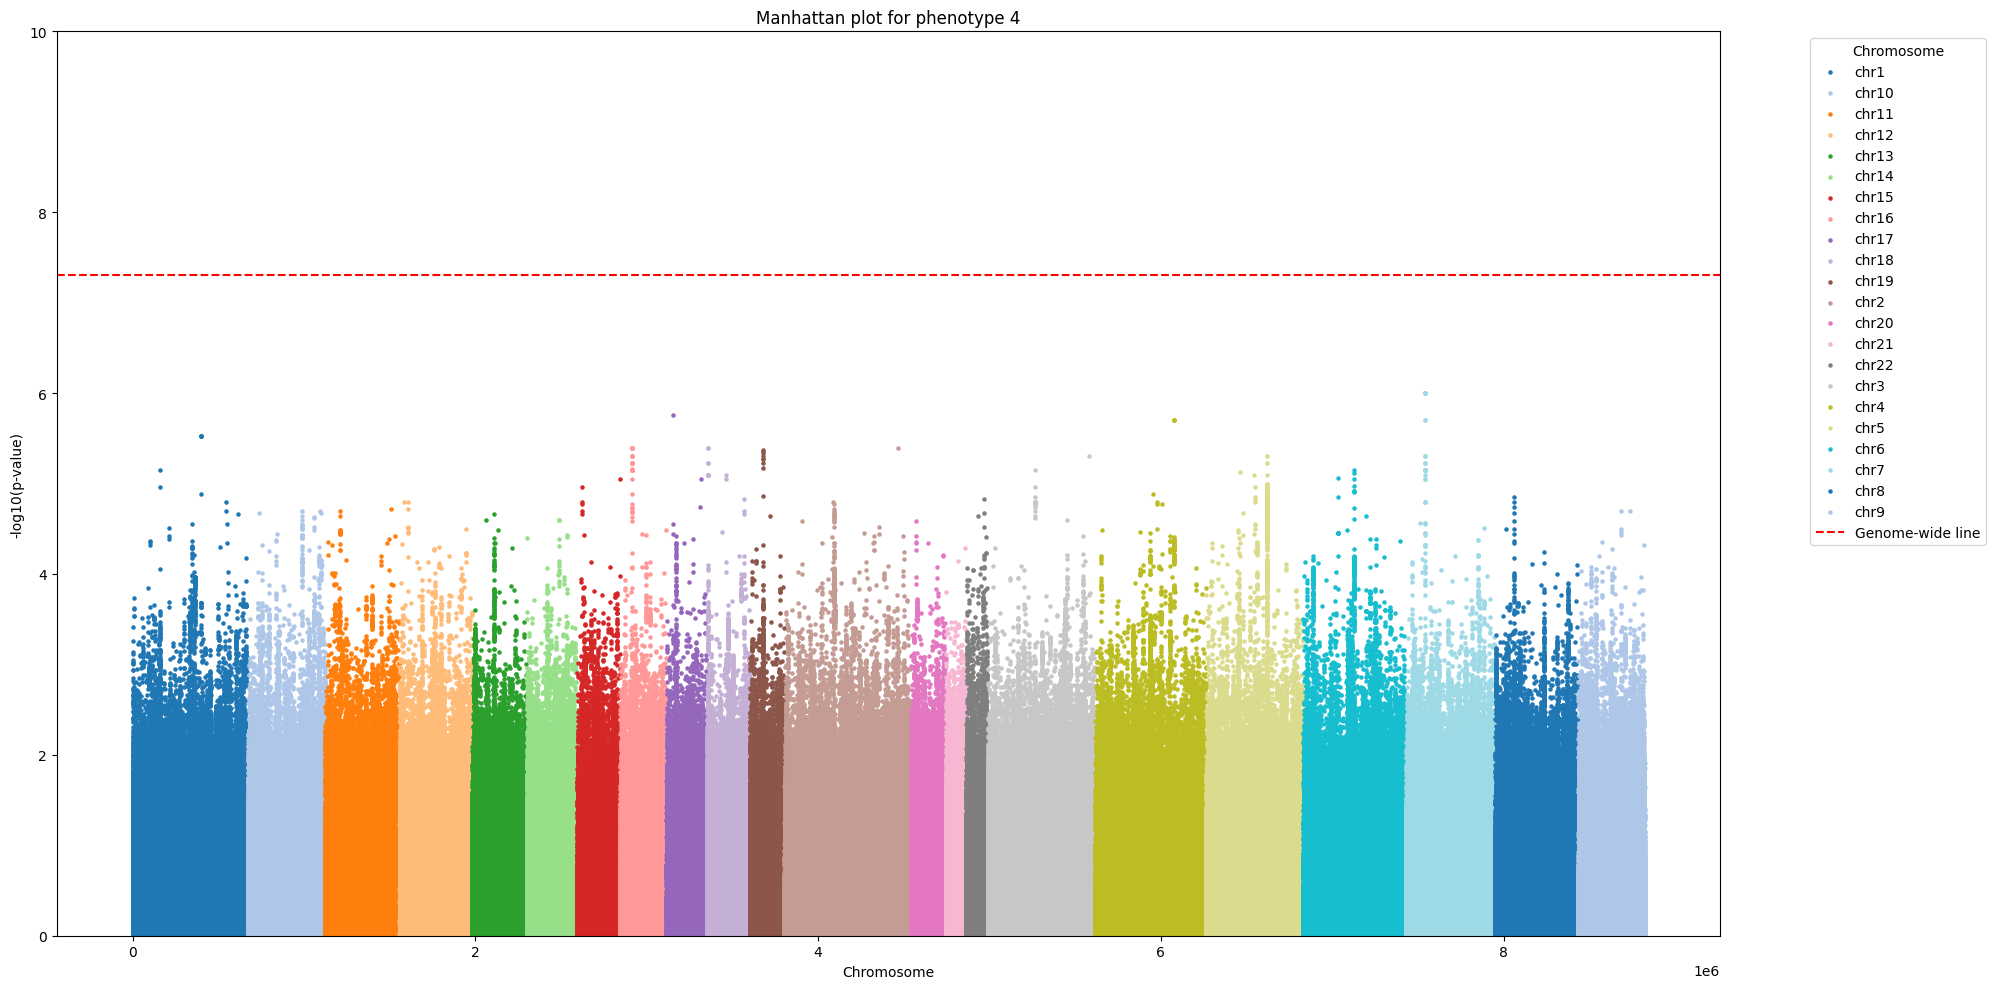

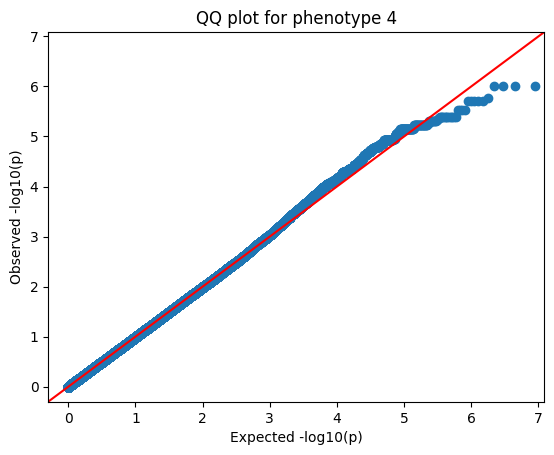

In [12]:
num_rand_phenotypes = 5

for phenotype in range(num_rand_phenotypes):
    filename = f"random.pheno{phenotype}.glm-imputed.txt.gz"
    
    # Load data
    gwas = load_gwas_data(filename)
    print(f"Phenotype {phenotype}: Dimensions = {gwas.shape}")
    print(gwas.head())
    
    # Manhattan plot
    plot_manhattan(
        gwas,
        chr_col="chromosome",
        bp_col="position",
        p_col="pvalue",
        snp_col="variant_id",
        title=f"Manhattan plot for phenotype {phenotype}"
    )
    
    # QQ plot
    plot_qq(gwas["pvalue"], title=f"QQ plot for phenotype {phenotype}")
